In [565]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

In [566]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')
df = pd.concat([train_df, test_df], ignore_index=True)

#randomize
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [567]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

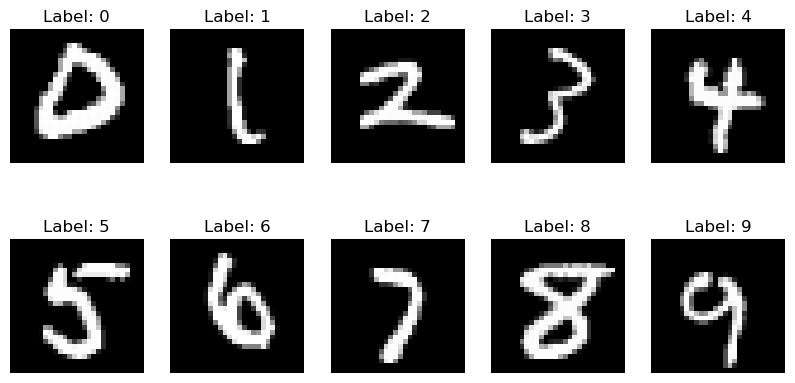

In [568]:
numbers = df.groupby("label").head(1).sort_values("label").reset_index(drop=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(len(numbers)):
    label = numbers.iloc[i, 0]
    image_data = numbers.iloc[i, 1:].values.reshape(28, 28)
    axes[i].imshow(image_data, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')

plt.show()

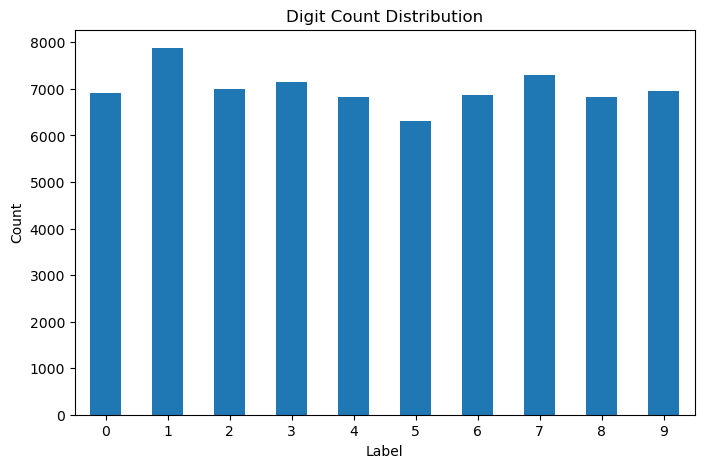

In [569]:
label_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Digit Count Distribution')
plt.xticks(rotation=0)
plt.show()

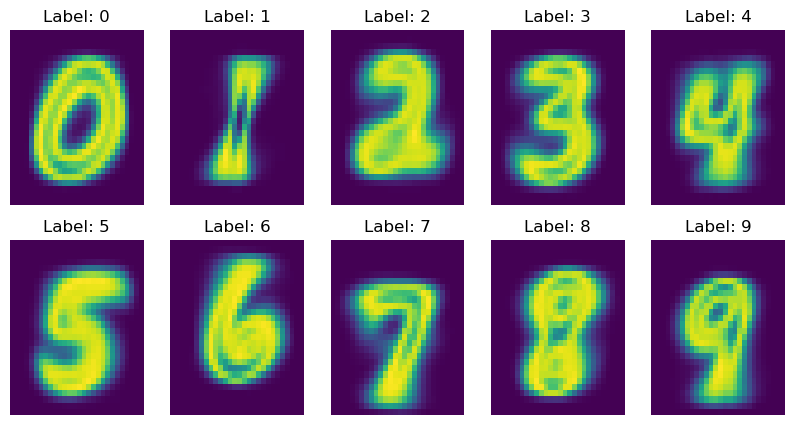

In [570]:
# https://medium.com/@24100160/mnist-dataset-exploratory-data-analysis-of-handwritten-digits-classification-9fcc3793ea7b

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    digit = df[df['label'] == i]
    variances = digit.iloc[:, 1:].var().values.reshape(28, 28)
    sns.heatmap(variances, cmap='viridis', cbar=False, ax=axes[i])
    axes[i].set_title(f'Label: {i}')
    axes[i].axis('off')

plt.show()

In [571]:
# Pre process the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# separate label column
X = df.drop('label', axis=1).values
# X = X / 255.0           # normalizing had no affect
y = df['label'].values

# split the data
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=11)

# scaler removed due to reducing accuracy of the model
# scaler = StandardScaler()
# X_trn = scaler.fit_transform(X_trn)
# X_tst = scaler.transform(X_tst)

# KNN (K Nearest Neighbor)

In [572]:
# euclidean distance function for knn
def euclidean_distance(a, b):
    dist = np.sqrt(np.sum((a - b) ** 2, axis=1))
    return dist

In [573]:
# cosine distance function for knn
def cosine_distance(x, y):
    dot_product = np.dot(x, y.T)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return 1 - (dot_product / (norm_x * norm_y))

# Test accuracy: 0.6848 vs 0.8751 for euclidean_distance

In [574]:
# KNN accuracy
def accuracy(y, y_hat):
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    are_same = (y == y_hat)
    total_correct = np.sum(are_same)
    
    total_samples = len(y)
    
    print(f"Accuracy ratio: {total_correct}/{total_samples}")
    
    acc = float(total_correct / total_samples)
    return acc

In [575]:
# add other metrics from sklearn
from sklearn.metrics import precision_score, recall_score, f1_score

In [576]:
class KNN():
    def __init__(self, k, distance_measure):
        self.k = k
        self.distance_measure = distance_measure
        self.X = None
        self.y = None
        
    def fit(self, X, y) -> None:
        self.X = X
        self.y = y
        
    def predict(self, X):
        y_hats: list = []
        for x in X:
            dist = self.distance_measure(x, self.X)
            top_k = np.argsort(dist)[:self.k]
            labels = self.y[top_k]
            count = np.bincount(labels)
            top = np.argmax(count)
            y_hats.append(top)
            
        y_hats = np.array(y_hats)
        return y_hats

In [577]:
# Initialize
knn = KNN(k=5, distance_measure=euclidean_distance)

# Train
# knn.fit(X_trn, y_trn)

# reduced sample size (10 seconds)
knn.fit(X_trn[:1000], y_trn[:1000])

# Compute test predictions
y_hat = knn.predict(X_tst)

# Compute metrics
test_acc = accuracy(y=y_tst, y_hat=y_hat)
test_prec = precision_score(y_tst, y_hat, average='macro')
test_rec = recall_score(y_tst, y_hat, average='macro')
test_f1 = f1_score(y_tst, y_hat, average='macro')

print("Accuracy:", test_acc)
print("Precision:", test_prec)
print("Recall:", test_rec)
print("F1-score (macro):", test_f1)

# running this with ALL samples takes over 11 minutes on my computer
# KNN = 1
# Accuracy ratio: 13185/14000
# Test accuracy: 0.9418

# KNN = 2
# Accuracy ratio: 13042/14000
# Test accuracy: 0.9316

# KNN = 3
# Accuracy ratio: 13182/14000
# Test accuracy: 0.9416

# KNN = 4
# Accuracy ratio: 13162/14000
# Test accuracy: 0.9401

# KNN = 5
# Accuracy ratio: 13237/14000
# Test accuracy: 0.9455

# KNN = 6
# Accuracy ratio: 13220/14000
# Test accuracy: 0.9443

Accuracy ratio: 12252/14000
Accuracy: 0.8751428571428571
Precision: 0.8835494689823393
Recall: 0.8715696893660623
F1-score (macro): 0.8736642272889915


# Neural Network

In [578]:
# activation functions

class Linear():
    @staticmethod
    def activation(z):
        return z
    
    @staticmethod
    def derivative(z):
        return np.ones(z.shape)

class Tanh():
    @staticmethod
    def activation(z):
        return np.tanh(z)

    @staticmethod
    def derivative(z):
        return 1- np.tanh(z) ** 2

In [579]:
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / e.sum(axis=1, keepdims=True)

def cross_entropy(y_true, y_pred, eps=1e-12):
    p = np.clip(y_pred, eps, 1-eps)
    return -np.mean(np.sum(y_true * np.log(p), axis=1))

In [580]:
def forward(X, W1, b1, W2, b2):
    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2) # change from Linear.activation(Z2)
    return Z1, A1, Z2, A2

In [581]:
def output_layer_grads(X, y, W1, Z1, A1, W2, Z2, A2):
    samples = y.shape[0]
    W2_avg_grad = (A1.T @ (A2 - y)) / samples
    b2_avg_grad = b2_avg_grad = (np.ones((samples, 1)).T @ (A2 - y)) / samples
    return W2_avg_grad, b2_avg_grad

In [582]:
def hidden_layer_grads(X, y, W1, Z1, A1, W2, Z2, A2):
    samples = y.shape[0]
    W1_avg_grad = (X.T @ (((A2 - y) @ W2.T) * Tanh.derivative(Z1))) / samples
    b1_avg_grad = (np.ones((samples, 1)).T @ (((A2 - y) @ W2.T) * Tanh.derivative(Z1))) / samples
    return W1_avg_grad, b1_avg_grad

In [583]:
def init_weights(
    m_input_features, 
    hidden_neurons, 
    output_neurons, 
):
    W1, b1, W2, b2 = None, None, None, None

    W1 = np.random.uniform(-0.5, 0.5, (m_input_features, hidden_neurons))
    W2 = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))

    b1 = np.ones((1, hidden_neurons))
    b2 = np.ones((1, output_neurons))
    
    return W1, b1, W2, b2

In [584]:
def get_batches(data_len, batch_size = 32):
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]
    return batches

In [ ]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(self, X, y, X_vld = None, y_vld = None):
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        N = y.shape[0]

        self.W1, self.b1, self.W2, self.b2 = init_weights(
            X.shape[1], self.hidden_neurons, self.output_neurons
        )

        for e in range(self.epochs):
            batches = get_batches(N, self.batch_size)

            for b in batches:
                Z1, A1, Z2, A2 = forward(
                    X[b], self.W1, self.b1, self.W2, self.b2
                )
                W2_avg_grad, b2_avg_grad = output_layer_grads(
                    X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2
                )
                W1_avg_grad, b1_avg_grad = hidden_layer_grads(
                    X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2
                )

                self.W2 = self.W2 - self.alpha * W2_avg_grad
                self.b2 = self.b2 - self.alpha * b2_avg_grad
                self.W1 = self.W1 - self.alpha * W1_avg_grad
                self.b1 = self.b1 - self.alpha * b1_avg_grad

            trn_preds = self.predict(X)
            trn_error = cross_entropy(y_onehot, trn_preds)
            self.trn_error.append(float(trn_error))

            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_error = cross_entropy(y_vld, vld_preds)
                self.vld_error.append(float(vld_error))
        
        return self
    
    def predict(self, X):
        Z1, A1, Z2, A2 = forward(
            X, self.W1, self.b1, self.W2, self.b2
        )
        
        return np.argmax(A2, axis=1)

In [598]:
# split the data 

# separate label column
X = df.drop('label', axis=1).values / 255 # normalize
y = df['label'].values

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_vld = scaler.transform(X_vld)
X_tst = scaler.transform(X_tst)

y_trn = y_trn.reshape(-1, 1)
y_vld = y_vld.reshape(-1, 1)
y_tst = y_tst.reshape(-1, 1)


In [599]:
nn = NeuralNetwork(255, 10, .01, 16, 100, 11)
nn.fit(X_trn, y_trn, X_vld, y_vld)

y_trn_hat = nn.predict(X_trn)
print(f"Train Error: {cross_entropy(y_trn, y_trn_hat)}")

y_vld_hat = nn.predict(X_vld)
print(f"Validation Error: {cross_entropy(y_vld, y_vld_hat)}")

y_tst_hat = nn.predict(X_tst)
print(f"Test Error: {cross_entropy(y_tst, y_tst_hat)}")

# plot learning curve
plt.plot(nn.trn_error, label='Train loss')
plt.plot(nn.vld_error, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# training time is 17 minutes (255, 10, .01, 16, 100, 11)
# train loss and validation loss diverge

ValueError: operands could not be broadcast together with shapes (44800,10) (44800,) 

In [588]:
# hyperparameter search (very slow)

hidden_list = [20, 50, 75, 100]
alpha_list  = [.01, .005, .001]
batches  = [2, 4, 8, 16, 32, 64]

# for b in batches: 
#     for h in hidden_list:
#         for a in alpha_list:
#             nn = NeuralNetwork(
#                 hidden_neurons=h,
#                 output_neurons=10,
#                 alpha=a,
#                 batch_size=b,
#                 epochs=100,
#                 seed=11
#             )
#             nn.fit(X_trn, y_trn, X_vld, y_vld)
#             val_rmse = float(rmse(y_vld, nn.predict(X_vld)))
            
#             print(f"h={h:2d}, a={a:.3f}, b={b} - val RMSE {val_rmse:.4f}")

In [589]:
def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    y_pred_class = np.round(y_pred).astype(int)
    return np.mean(y_pred_class == y_true)

print(f"Train Accuracy: {accuracy(y_trn, y_trn_hat):.4f}")
print(f"Validation Accuracy: {accuracy(y_vld, y_vld_hat):.4f}")
print(f"Test Accuracy: {accuracy(y_tst, y_tst_hat):.4f}")

Train Accuracy: 0.0818
Validation Accuracy: 0.0823
Test Accuracy: 0.0773


In [ ]:
# Compute metrics
y_hat = nn.predict(X_tst)

test_acc = accuracy(y_tst, y_hat)
test_prec = precision_score(y_tst, y_hat, average='macro')
test_rec = recall_score(y_tst, y_hat, average='macro')
test_f1 = f1_score(y_tst, y_hat, average='macro')

print("Accuracy:", test_acc)
print("Precision:", test_prec)
print("Recall:", test_rec)
print("F1-score:", test_f1)

Accuracy: 0.07728571428571429
Precision: 0.09929826379291337
Recall: 0.08022523787250233
F1-score: 0.06771078081897147


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_tst, y_hat, cmap='Blues')
plt.title('kNN Confusion Matrix')
plt.show()

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9260 - loss: 0.4435
Train Loss: 0.4434362053871155, Accuracy: 0.9274553656578064
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9119 - loss: 0.6006
Validate Loss: 0.6641209721565247, Accuracy: 0.9100893139839172
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9077 - loss: 0.6845
Test Loss: 0.7160425782203674, Accuracy: 0.9084285497665405


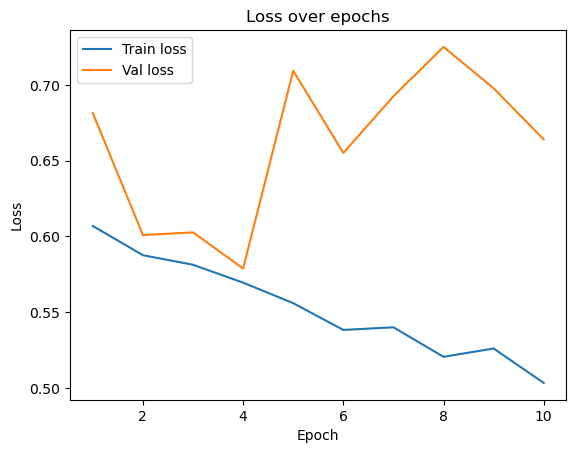

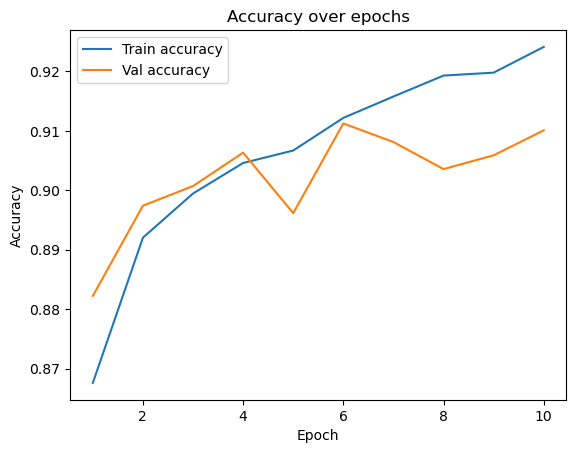

In [ ]:
import tensorflow as tf

epochs = 100

model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_trn.shape[1],)),
    tf.keras.layers.Dense(255, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])


history = model.fit(X_trn, y_trn, epochs=10, verbose=0,
          validation_data=(X_vld, y_vld))

loss, acc = model.evaluate(X_trn, y_trn, verbose=1)
print(f"Train Loss: {loss}, Accuracy: {acc}")

loss, acc = model.evaluate(X_vld, y_vld, verbose=1)
print(f"Validate Loss: {loss}, Accuracy: {acc}")

loss, acc = model.evaluate(X_tst, y_tst, verbose=1)
print(f"Test Loss: {loss}, Accuracy: {acc}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, label='Train loss')
plt.plot(epochs, val_loss,   label='Val loss')
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, label='Train accuracy')
plt.plot(epochs, val_acc,   label='Val accuracy')
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Compute metrics
y_prob = model.predict(X_tst)
y_hat  = np.argmax(y_prob, axis=1)

test_acc = accuracy(y_tst, y_hat)
test_prec = precision_score(y_tst, y_hat, average='macro')
test_rec = recall_score(y_tst, y_hat, average='macro')
test_f1 = f1_score(y_tst, y_hat, average='macro')

print("Accuracy:", test_acc)
print("Precision:", test_prec)
print("Recall:", test_rec)
print("F1-score:", test_f1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step
Accuracy: 0.9084285714285715
Precision: 0.9087366960492205
Recall: 0.9071816688026988
F1-score (macro): 0.9074162749657381


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_tst, y_hat, cmap='Blues')
plt.title('NN Confusion Matrix')
plt.show()